In [2]:
import pandas as pd


### Read data

In [3]:
data=pd.read_csv("data/iris.csv",delimiter=",",names=['sep_len_cm','sep_wdth_cm','petal_len_cm','petal_wdth_cm','class'])

### Exploratory analysis

In [4]:
data.head()

,sep_len_cm,sep_wdth_cm,petal_len_cm,petal_wdth_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,sep_len_cm,sep_wdth_cm,petal_len_cm,petal_wdth_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Obs:  No missing data

In [7]:
data.dtypes

sep_len_cm       float64
sep_wdth_cm      float64
petal_len_cm     float64
petal_wdth_cm    float64
class             object
dtype: object

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

C:\Users\212458098\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Normalize features

In [9]:
features=['sep_len_cm', 'sep_wdth_cm', 'petal_len_cm', 'petal_wdth_cm']
std_scaler=StandardScaler().fit(data[features])
X=std_scaler.transform(data[features])

In [10]:
X=pd.DataFrame(X)

### Add index as separate column

In [11]:
X.reset_index(inplace=True)

In [12]:
Y=pd.DataFrame(data['class'])

In [13]:
Y.reset_index(inplace=True)

### Train Test split randomly

In [14]:
(X_tr,X_test,Y_tr,Y_test)=train_test_split(X,Y,test_size=0.25,random_state=40)

In [15]:
X_tr.head()

,index,0,1,2,3
113,113,-0.173674,-1.281972,0.705893,1.053537
15,15,-0.173674,3.114684,-1.284407,-1.050031
3,3,-1.506521,0.106445,-1.284407,-1.312977
86,86,1.038005,0.106445,0.535296,0.396172
127,127,0.310998,-0.124958,0.649027,0.790591


In [16]:
Y_tr.head()

,index,class
113,113,Iris-virginica
15,15,Iris-setosa
3,3,Iris-setosa
86,86,Iris-versicolor
127,127,Iris-virginica


In [17]:
Y_test.shape

(38, 2)

### Run clustering algorithm , varying number of clusters

In [18]:
from scipy.spatial.distance import cdist

In [19]:
clusters=range(1,10)
meandist=[]
clust_labels=[]

In [22]:
from sklearn.cluster import  KMeans
import numpy as np

In [23]:
for k in clusters:
    model=KMeans(n_clusters=k,max_iter=750)
    model.fit(X_tr)
    cluster_assign=model.predict(X_tr)
    clust_labels.append(cluster_assign)
    meandist.append(sum(np.min(cdist(X_tr,model.cluster_centers_,'euclidean'),axis=1))/X_tr.shape[0])
    

In [79]:
meandist

[37.651840777030699,
 18.793692291885201,
 13.12736667811088,
 9.4566311110605152,
 7.6070412018966946,
 6.3606574231139899,
 5.3871541619131742,
 4.8905976776914271,
 4.3171844310536711]

## Elbow curve

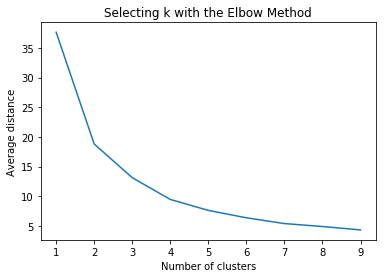

In [83]:
import matplotlib.pylab as plt
%matplotlib inline  
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

### Run PCA and extract 2 components

In [24]:
from sklearn.decomposition import  PCA
pca_2=PCA(2)

In [ ]:
# Check for clusters=2,3,4

### Check explained variance

In [25]:
prim_comp=pca_2.fit_transform(X_tr)

In [26]:
print(pca_2.explained_variance_ratio_) 

[  9.99052687e-01   4.95310583e-04]


In [27]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca_2.explained_variance_ratio_, decimals=4)*100)
print var1

[ 99.91  99.96]


### Plot to check intra cluster distance, see if any overlap is there

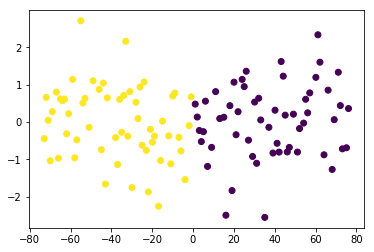

In [106]:
plt.scatter(prim_comp[:,0],prim_comp[:,1],c=clust_labels[1])

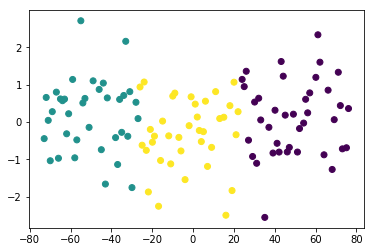

In [107]:
plt.scatter(prim_comp[:,0],prim_comp[:,1],c=clust_labels[2])

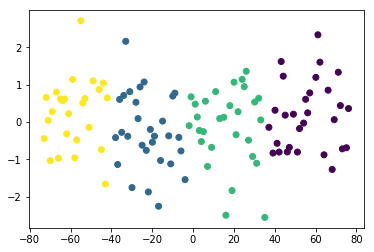

In [108]:
plt.scatter(prim_comp[:,0],prim_comp[:,1],c=clust_labels[3])